In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('./某省电力负荷(20170101-20190411).xlsx')
A_data = data[data['名称']=='A负荷计划']

In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [7]:
# 假设df是包含数据的Pandas DataFrame，'Date'是日期列，'V00'是你想要预测的目标列
tf = A_data.values
dates = tf[:, 0]  # 日期列
values = tf[:, 2:]  # 其余列作为特征

In [8]:
dates

array([Timestamp('2019-01-01 00:00:00'), Timestamp('2019-01-02 00:00:00'),
       Timestamp('2019-01-03 00:00:00'), Timestamp('2019-01-04 00:00:00'),
       Timestamp('2019-01-05 00:00:00'), Timestamp('2019-01-06 00:00:00'),
       Timestamp('2019-01-07 00:00:00'), Timestamp('2019-01-08 00:00:00'),
       Timestamp('2019-01-09 00:00:00'), Timestamp('2019-01-10 00:00:00'),
       Timestamp('2019-01-11 00:00:00'), Timestamp('2019-01-12 00:00:00'),
       Timestamp('2019-01-13 00:00:00'), Timestamp('2019-01-14 00:00:00'),
       Timestamp('2019-01-15 00:00:00'), Timestamp('2019-01-16 00:00:00'),
       Timestamp('2019-01-17 00:00:00'), Timestamp('2019-01-18 00:00:00'),
       Timestamp('2019-01-19 00:00:00'), Timestamp('2019-01-20 00:00:00'),
       Timestamp('2019-01-21 00:00:00'), Timestamp('2019-01-22 00:00:00'),
       Timestamp('2019-01-23 00:00:00'), Timestamp('2019-01-24 00:00:00'),
       Timestamp('2019-01-25 00:00:00'), Timestamp('2019-01-26 00:00:00'),
       Timestamp('2019-01

In [9]:
values

array([[4347, 4133, 4001, ..., 5002, 4825, 4638],
       [4497, 4487, 4303, ..., 5408, 5232, 5162],
       [4964, 4538, 4377, ..., 5458, 5282, 5055],
       ...,
       [3578, 3103, 3000, ..., 3719, 3572, 3420],
       [3280, 3148, 3053, ..., 3654, 3502, 3359],
       [3206, 2885, 2777, ..., 3147, 3055, 2926]], dtype=object)

In [10]:
# 数据预处理
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values)

In [11]:
scaled_data

array([[0.58428601, 0.5832968 , 0.57086268, ..., 0.6628618 , 0.64754098,
        0.62386831],
       [0.61546456, 0.66089434, 0.63732394, ..., 0.74561761, 0.73094262,
        0.73168724],
       [0.71253378, 0.67207365, 0.65360915, ..., 0.75580921, 0.74118852,
        0.70967078],
       ...,
       [0.42444398, 0.35751863, 0.35057218, ..., 0.40134529, 0.39077869,
        0.37325103],
       [0.3625026 , 0.36738273, 0.36223592, ..., 0.38809621, 0.37643443,
        0.36069959],
       [0.34712118, 0.30973257, 0.30149648, ..., 0.28475336, 0.28483607,
        0.27160494]])

In [12]:
# 构建数据集
X, y = [], []
for i in range(1, len(scaled_data)):
    X.append(scaled_data[i-1:i, :])
    y.append(scaled_data[i-1, 0])  # 假设我们预测的是'V00'

In [13]:
X = np.array(X)
y = np.array(y)

In [14]:
X

array([[[0.58428601, 0.5832968 , 0.57086268, ..., 0.6628618 ,
         0.64754098, 0.62386831]],

       [[0.61546456, 0.66089434, 0.63732394, ..., 0.74561761,
         0.73094262, 0.73168724]],

       [[0.71253378, 0.67207365, 0.65360915, ..., 0.75580921,
         0.74118852, 0.70967078]],

       ...,

       [[0.35876117, 0.40355107, 0.39612676, ..., 0.47492866,
         0.46577869, 0.44135802]],

       [[0.42444398, 0.35751863, 0.35057218, ..., 0.40134529,
         0.39077869, 0.37325103]],

       [[0.3625026 , 0.36738273, 0.36223592, ..., 0.38809621,
         0.37643443, 0.36069959]]])

In [15]:
y

array([0.58428601, 0.61546456, 0.71253378, 0.67220952, 0.61899813,
       0.62627312, 0.56994388, 0.65932239, 0.66742881, 0.62149241,
       0.64019954, 0.63396383, 0.60881314, 0.53834962, 0.64373311,
       0.66618167, 0.67511952, 0.62336313, 0.56932031, 0.52816462,
       0.55206818, 0.62648098, 0.57472459, 0.46227396, 0.48784037,
       0.45562253, 0.4398254 , 0.42111827, 0.42839327, 0.41259613,
       0.40490543, 0.37954687, 0.39181043, 0.23550197, 0.17771773,
       0.22635627, 0.03304926, 0.14508418, 0.11577635, 0.1633756 ,
       0.19829557, 0.35356475, 0.16545417, 0.60839742, 0.60735814,
       0.56848888, 0.52525462, 0.55539389, 0.49532322, 0.61712742,
       0.59634172, 0.54313033, 0.56848888, 0.52878819, 0.54042819,
       0.58262316, 0.50800249, 0.54022033, 0.53460819, 0.45520682,
       0.48409894, 0.43109541, 0.3460819 , 0.41654542, 0.42548327,
       0.38141758, 0.39950114, 0.38765329, 0.38224901, 0.36458117,
       0.32113906, 0.31427978, 0.39700686, 0.30970692, 0.31448

In [16]:
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# 构建LSTM模型
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# 训练模型
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1614
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0314 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0075 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057  
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039  
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6012e-04 
Epoch 81/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4161e-04 
Epoch 82/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1123e-04 
Epoch 83/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1393e-04 
Epoch 84/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4423e-04 
Epoch 85/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6752e-04 
Epoch 86/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3747e-04 
Epoch 87/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9065e-04 
Epoch 88/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2628e-04 
Epoch 89/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1686e-04 
Epoch 90/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9404e-04 
Epoch 91/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0292e-04 
Epoch 92/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4206e-04 
Epoch 93/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2710e-04 
Epoch

In [19]:
# 预测
predicted = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [20]:
predicted

array([[0.20021729],
       [0.42060295],
       [0.49186283],
       [0.11092353],
       [0.22727984],
       [0.6958003 ],
       [0.3881001 ],
       [0.32188627],
       [0.33865112],
       [0.35753015],
       [0.17955287],
       [0.5158166 ],
       [0.3647931 ],
       [0.23686658],
       [0.40576795],
       [0.26218942],
       [0.45085534],
       [0.33855394],
       [0.20000337],
       [0.25259686],
       [0.33072796],
       [0.41903156],
       [0.22406091],
       [0.17631781],
       [0.5349937 ],
       [0.50624424],
       [0.5405015 ],
       [0.19512069],
       [0.22368006],
       [0.47892505],
       [0.26107144],
       [0.31403208],
       [0.41619468],
       [0.25066897],
       [0.16503116],
       [0.2107267 ],
       [0.3239928 ],
       [0.38087648],
       [0.38149756],
       [0.3802289 ],
       [0.2224381 ],
       [0.746247  ],
       [0.4627729 ],
       [0.25046128],
       [0.57166797],
       [0.39994413],
       [0.23879826],
       [0.242

In [21]:
y_test

array([0.197672  , 0.42943255, 0.50758678, 0.10268136, 0.22531698,
       0.68551237, 0.39347329, 0.33215548, 0.34940761, 0.37227188,
       0.17792559, 0.51735606, 0.37871544, 0.24236126, 0.40490543,
       0.27187695, 0.48181251, 0.35044689, 0.19995843, 0.25774267,
       0.3252962 , 0.41654542, 0.22885055, 0.16877988, 0.54022033,
       0.51049678, 0.54105176, 0.21492413, 0.22905841, 0.49740179,
       0.27437123, 0.32342548, 0.41862399, 0.25919767, 0.1633756 ,
       0.20369985, 0.32550405, 0.39305758, 0.38765329, 0.38141758,
       0.21866556, 0.75202661, 0.46227396, 0.24485554, 0.58574101,
       0.39950114, 0.24402411, 0.24173768, 0.37123259, 0.2363334 ,
       0.27291623, 0.61608813, 0.31739763, 0.45063396, 0.25774267,
       0.22240698, 0.32363334, 0.32404905, 0.13261276, 0.54541675,
       0.3803783 , 0.35210975, 0.57701102, 0.13760133, 0.72251091,
       0.22905841, 0.45437539, 0.07753066, 0.70234878, 0.35210975,
       0.21367699, 0.61712742, 0.46996466, 0.32508834, 0.33194

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

Root Mean Squared Error: 0.013287447033253
R-squared: 0.9941066935577864


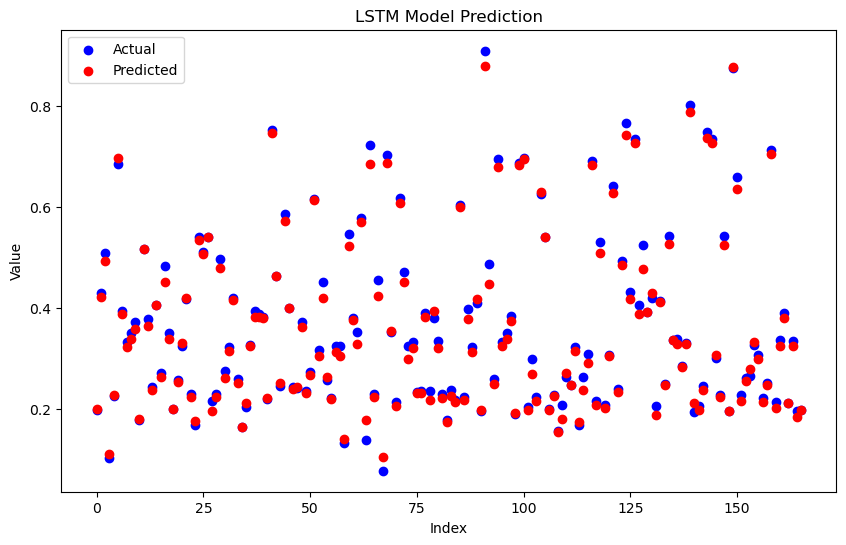

In [23]:
# 计算性能指标
rmse = np.sqrt(mean_squared_error(y_test, predicted))
r2 = r2_score(y_test, predicted)

print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# 如果需要，可以进行可视化
# 例如，绘制实际值与预测值的对比图
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predicted)), predicted, color='red', label='Predicted')
plt.title('LSTM Model Prediction')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()